In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
sns.set()

### Load the Boston data set

In [2]:
df = pd.read_csv("../Data/Boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Fit a simple linear regression model for each predictor

In [3]:
print('p-values of the univariate regression coefficients : ')
predictors = df.columns.values.tolist()
predictors.remove('crim')
univariate_coefficients = pd.Series()
for predictor in predictors :
    fit = sm.ols("crim ~ " + predictor, df).fit()
    univariate_coefficients[predictor] = fit.params[1]
    print(predictor, end=' : ')
    print(fit.pvalues[1])

p-values of the univariate regression coefficients : 
zn : 5.50647210768e-06
indus : 1.45034893303e-21
chas : 0.209434501535
nox : 3.75173926036e-23
rm : 6.34670298469e-07
age : 2.85486935024e-16
dis : 8.51994876693e-19
rad : 2.69384439819e-56
tax : 2.35712683526e-47
ptratio : 2.94292244736e-11
black : 2.48727397377e-19
lstat : 2.65427723147e-27
medv : 1.17398708219e-19


*chas*, Charles River dummy variable (= 1 if tract bounds river; 0 otherwise), has the highest p-value (0.21). We cannot reject the null hypothesis for this predictor.

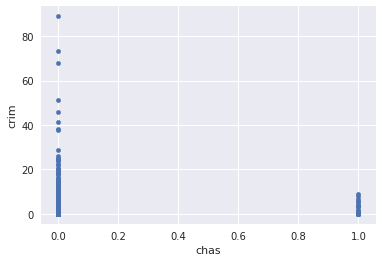

In [4]:
df.plot.scatter('chas', 'crim');

*rad*, index of accessibility to radial highways, has the lowest p-value (2.69e-56). It has a statistical significant association with the response *crim*.

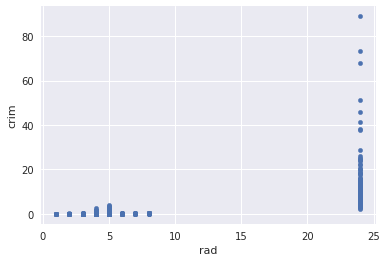

In [5]:
df.plot.scatter('rad', 'crim');

### Fit a multiple regression model using all of the predictors

In [6]:
multiple_fit = sm.ols("crim ~ " + "+".join(predictors), df).fit()
multiple_fit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.440    
Dependent Variable: crim             AIC:                3334.5214
Date:               2017-11-30 12:50 BIC:                3393.6929
No. Observations:   506              Log-Likelihood:     -1653.3  
Df Model:           13               F-statistic:        31.47    
Df Residuals:       492              Prob (F-statistic): 1.57e-56 
R-squared:          0.454            Scale:              41.463   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     17.0332    7.2349   2.3543  0.0189    2.8181  31.2483
zn             0.0449    0.0187   2.3943  0.0170    0.0080   0.0817
indus         -0.0639    0.0834  -0.7656  0.4443   -0.2277   0.1000
chas          -0.7491    1.1801  -0.6348  0.5259   -3.0679   1.5696
nox          -10.3135    5.2755  -1.9550  0.0512  -20.6789   0.0518
rm             0.4301    0.6128   0.7019  0.4831   -0.7740   1.6342
age            0.0015    0.0179   0.0810  0.9355   -0.0338   0.0367
dis           -0.9872    0.2818  -3.5029  0.0005   -1.5409  -0.4335
rad            0.5882    0.0880   6.6804  0.0000    0.4152   0.7612
tax           -0.0038    0.0052  -0.7332  0.4638   -0.0139   0.0063
ptratio       -0.2711    0.1865  -1.4539  0.1466   -0.6374   0.0953
black         -0.0075    0.0037  -2.0520  0.0407   -0.0148  -0.0003
lstat          0.1262    0.0757   1.6667  0.0962   -0.0226   0.2750
medv          -0.1989    0.0605  -3.2865  0.0011   -0.3178  -0.0800
------------------------------------------------------------------
Omnibus:             666.613      Durbin-Watson:         1.519    
Prob(Omnibus):       0.000        Jarque-Bera (JB):      84887.625
Skew:                6.617        Prob(JB):              0.000    
Kurtosis:            65.058       Condition No.:         15777    
==================================================================
* The condition number is large (2e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Predictors for which we can reject the null hypothesis :

In [7]:
coef_table = multiple_fit.summary2().tables[1]
coef_table['Univariate Coef.'] = univariate_coefficients
coef_table[coef_table['P>|t|'] < 0.05]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975],Univariate Coef.
Intercept,17.033228,7.234903,2.354313,1.894909e-02,2.818109,31.248346,NaN
zn,0.044855,0.018734,2.394312,1.702489e-02,0.008047,0.081664,-0.073935
dis,-0.987176,0.281817,-3.502893,5.022039e-04,-1.540890,-0.433462,-1.550902
rad,0.588209,0.088049,6.680448,6.460451e-11,0.415210,0.761208,0.617911
black,-0.007538,0.003673,-2.051959,4.070233e-02,-0.014755,-0.000320,-0.036280
medv,-0.198887,0.060516,-3.286517,1.086810e-03,-0.317788,-0.079985,-0.363160


Plot of the univariate regression coefficients on the x-axis versus the multiple regression coefficients on the y-axis :

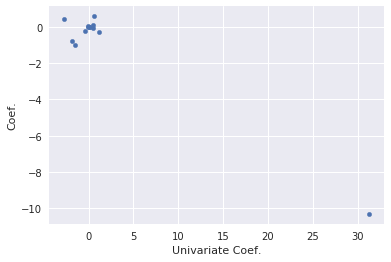

In [8]:
coef_table.plot.scatter('Univariate Coef.', 'Coef.');

### Investigate evidence of non-linear association between any of the predictors and the response

In [9]:
for predictor in predictors :
    simple_formula = "crim ~ {0}".format(predictor)
    simple_fit = sm.ols(simple_formula, df).fit()
    polynomial_formula = "crim ~ {0} + np.power({0}, 2) + np.power({0}, 3)".format(predictor)
    polynomial_fit = sm.ols(polynomial_formula, df).fit()
    
    print('Improvement adj. rsquared {0}'.format(predictor), end=' : ')
    print(polynomial_fit.rsquared_adj, end=' / ')
    print(simple_fit.rsquared_adj, end=' = ')    
    print(polynomial_fit.rsquared_adj / simple_fit.rsquared_adj) 

Improvement adj. rsquared zn : 0.052613938212 / 0.0382835189607 = 1.37432345929
Improvement adj. rsquared indus : 0.255233502489 / 0.163653939618 = 1.55959277903
Improvement adj. rsquared chas : 0.00114594013188 / 0.00114594013188 = 1.0
Improvement adj. rsquared nox : 0.292776568312 / 0.175584676201 = 1.66743803985
Improvement adj. rsquared rm : 0.0622150615343 / 0.0461803649635 = 1.34721892266
Improvement adj. rsquared age : 0.169296119046 / 0.122684192735 = 1.3799342464
Improvement adj. rsquared dis : 0.273508984878 / 0.142451258606 = 1.92001802971
Improvement adj. rsquared rad : 0.396451435004 / 0.390048862716 = 1.01641479543
Improvement adj. rsquared tax : 0.365110458625 / 0.338303954179 = 1.07923792824
Improvement adj. rsquared ptratio : 0.108485451416 / 0.0822511144178 = 1.31895418298
Improvement adj. rsquared black : 0.144759190329 / 0.146584307359 = 0.987549028518
Improvement adj. rsquared lstat : 0.213258721859 / 0.206018692321 = 1.03514258564
Improvement adj. rsquared medv : 

*medv*, median value of owner-occupied homes in $1000s, seems to have a non-linear relationship with *crim*. Also *dis*, *nox* and *indus* have a sizeable improvement of adj. rsquared.